In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
from sklearn import ensemble, model_selection, metrics, tree
from sklearn.datasets import load_digits
from matplotlib.pyplot import plot

import numpy as np
import pandas as pd

In [69]:
def write_answer(answer, task_number):
    with open(f"answer{task_number}.txt", "w") as fout:
        fout.write(str(answer))

In [22]:
digits = load_digits()
digits_data = pd.DataFrame(digits.data)
digits_target = pd.DataFrame(digits.target)

In [26]:
X, y = 
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(digits_data, 
                                                                                    digits_target, 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

In [64]:
dt_clf = tree.DecisionTreeClassifier()

In [128]:
rf_score = model_selection.cross_val_score(dt_clf, digits.data, digits.target, cv=10, n_jobs=-1)
rf_score.mean()

0.8174177529484792

In [129]:
write_answer(rf_score.mean(), 1)

In [71]:
dt_clf = tree.DecisionTreeClassifier()
bagging_clf = ensemble.BaggingClassifier(base_estimator = dt_clf, 
                                         n_estimators = 100)
bagging_score = model_selection.cross_val_score(bagging_clf, 
                                                digits.data, 
                                                digits.target, 
                                                cv=10, 
                                                n_jobs=-1)
write_answer(bagging_score.mean(), 2)

In [72]:
from math import sqrt
bagging_sqrt_features_clf = ensemble.BaggingClassifier(base_estimator = dt_clf, 
                                                       max_features=int(sqrt(digits.data.shape[1])), 
                                                       n_estimators = 100)
bagging_sqrt_features_score = model_selection.cross_val_score(bagging_sqrt_features_clf, 
                                                              digits.data, 
                                                              digits.target, 
                                                              cv=10, 
                                                              n_jobs=-1)
write_answer(bagging_sqrt_features_score.mean(), 3)

In [73]:
bagging_rndm_dt_clf = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(max_features="sqrt"), 
                                                 n_estimators = 100)
bagging_rndm_dt_features_score = model_selection.cross_val_score(bagging_rndm_dt_clf, 
                                                                 digits.data, 
                                                                 digits.target, 
                                                                 cv=10, 
                                                                 n_jobs=-1)
write_answer(bagging_rndm_dt_features_score.mean(), 4)

In [95]:
# как качество модели зависит от количества деревьев
n_trees = []
n_trees_score = []
for num in range(1, 120, 5):
    rf_score = model_selection.cross_val_score(ensemble.RandomForestClassifier(n_estimators=num), 
                                                                               digits.data, 
                                                                               digits.target, 
                                                                               cv=10, 
                                                                               n_jobs=-1)
    n_trees.append(num)
    n_trees_score.append(rf_score.mean())

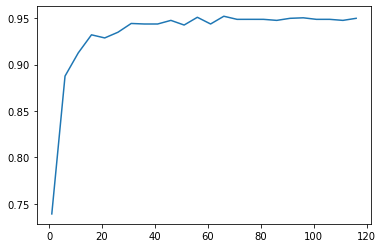

In [96]:
plot(n_trees, n_trees_score)

In [102]:
# как качество модели зависит от максимальной глубины деревьев
n_depth = []
n_depth_score = []
for num in range(1, 50, 1):
    rf_score = model_selection.cross_val_score(ensemble.RandomForestClassifier(max_depth=num), 
                                                                               digits.data, 
                                                                               digits.target, 
                                                                               cv=10, 
                                                                               n_jobs=-1)
    n_depth.append(num)
    n_depth_score.append(rf_score.mean())

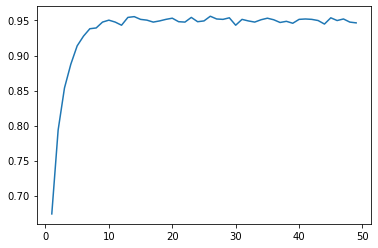

In [103]:
plot(n_depth, n_depth_score)

In [100]:
# как качество модели зависит от количества признаков
n_features = [1, 2, 5, 10, 12, 15, 20, 25, 30, 35, 40, 50]
#[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
n_features_score = []
for num in n_features:
    rf_score = model_selection.cross_val_score(ensemble.RandomForestClassifier(max_features=num), 
                                                                               digits.data, 
                                                                               digits.target, 
                                                                               cv=10, 
                                                                               n_jobs=-1)
    n_features_score.append(rf_score.mean())

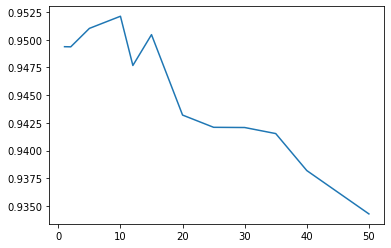

In [101]:
plot(n_features, n_features_score)

In [125]:
with open("answer5.txt", "w") as fout:
    fout.write("2 3 4 7")

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
print('make classification ...')
X,y = make_classification(n_samples=1000000,
                         n_features=50,
                         n_informative=30,
                         n_redundant=5,
                         n_repeated=0,
                         n_classes=2,
                         n_clusters_per_class=2,
                         class_sep=1,
                         flip_y=0.01,
                         weights=[0.5,0.5],
                         random_state=17)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1000)
print(f'X_train shape: {X_train.shape}')
print(f'Train LGBM classifier ...')
clf = LGBMClassifier(n_estimators=100,
                     num_leaves=64,
                     max_depth=5,
                     learning_rate=0.1,
                     random_state=1000,
                     n_jobs=-1)
start = time.time()
clf.fit(X_train,y_train)
elapsed = time.time() - start
print(f'LGBM Training ran in {elapsed:.5f} seconds')
y_pred = clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,y_pred):.2f}')
print(f'Train XGB classifier ...')
clf = XGBClassifier(n_estimators=100,
                     max_depth=5,
                     max_leaves=64,
                     eta=0.1,
                     reg_lambda=0,
                     tree_method='hist',
                     eval_metric='logloss',
                     use_label_encoder=False,
                     random_state=1000,
                     n_jobs=-1)
start = time.time()
clf.fit(X_train,y_train)
elapsed = time.time() - start
print(f'XGB Training ran in {elapsed:.5f} seconds')
y_pred = clf.predict(X_test)
print(f'Test Accuracy: {accuracy_score(y_test,y_pred):.2f}')

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/ilnazziaziev/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ilnazziaziev/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]


In [1]:
import xgboost

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/ilnazziaziev/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ilnazziaziev/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)"]
